### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import ssl
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from bs4 import BeautifulSoup
import contractions
import emoji
from textblob import TextBlob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Downloading required NLTK data 

In [2]:
# Handle SSL certificate issues for NLTK downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data
print("Downloading required NLTK data...")
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("NLTK data downloaded successfully")
except Exception as e:
    print(f"Error downloading NLTK data: {e}")

NLTK data downloaded successfully


### Combining all reviews into one dataframe

In [3]:
reviewsbmo = pd.read_json('reviews/com.bmo.mobile.json')
reviewsbmo.insert(0, 'bank', 'BMO')
reviewscibc = pd.read_json('reviews/com.cibc.android.mobi.json')
reviewscibc.insert(0,'bank', 'CIBC')
reviewsrbc = pd.read_json('reviews/com.rbc.mobile.android.json')
reviewsrbc.insert(0, 'bank', 'RBC')
reviewssb = pd.read_json('reviews/com.scotiabank.banking.json')
reviewssb.insert(0, 'bank', 'SCOTIA BANK')
reviewstd = pd.read_json('reviews/com.td.json')
reviewstd.insert(0, 'bank', 'TD')

all_reviews = pd.concat([reviewsbmo,reviewscibc,reviewsrbc,reviewssb,reviewstd], ignore_index = True)
all_reviews

,bank,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,BMO,c1e46217-4ef1-410b-811f-4376800cf5a9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not any use,1,0,6.20.2,2025-06-30 22:09:09,"Hi Arran, thanks for your review. We're sorry ...",2025-07-02 11:48:06,6.20.2
1,BMO,0aa7be3b-9527-458e-96d5-3e69abbcf7cf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I tried for 3days to access my account but bmo...,1,1,6.20.2,2025-06-30 21:01:44,"Hi Norbert, we're sorry to learn of your exper...",2025-07-02 09:18:46,6.20.2
2,BMO,97f17b6b-9759-4388-8bf5-71b7f7e2c42d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,great,5,0,6.20.2,2025-06-30 16:21:41,"Hi there, thank you for your review and rating...",2025-07-02 08:56:59,6.20.2
3,BMO,832aea75-58b0-4c8f-b553-eccd647c9299,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,GARBAGE. AND EVERY PERSON THAT WORKS AT AND FO...,1,1,None,2025-06-30 15:23:11,Hi Jessica. We're sorry to learn our services ...,2025-07-02 08:55:23,None
4,BMO,e940c7c4-3fbc-467c-a379-87680df7c93b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy to install. the layout is awesome. no tro...,5,1,6.20.2,2025-06-28 17:25:17,Hi Cathy! Thanks for your review and 5-stars! ...,2025-07-02 08:54:23,6.20.2
...,...,...,...,...,...,...,...,...,...,...,...,...
21300,TD,b9e18543-63bc-4fe2-9b65-4a04b15a753b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,stopped working on my work phone. had to trans...,3,0,23.2.0,2023-05-31 10:16:22,None,None,23.2.0
21301,TD,fc559a89-7768-4924-ad8c-f645556821ca,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is horrible. Wasted 2 hours on the ph...,1,1,23.3.0,2023-05-31 08:02:10,None,None,23.3.0
21302,TD,3c6bffac-16a9-4353-ae8b-d1062c829906,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Always saying NO INTERNET wherever on mobile d...,1,0,23.2.0,2023-05-31 07:21:35,None,None,23.2.0
21303,TD,a1144dde-78dc-46ba-9226-3325f3a60759,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,T.D is just superior to all others,5,0,23.3.0,2023-05-31 06:44:32,None,None,23.3.0


### Removing unneccesary columns and dropping rows with missing values and saving the cleaned dataframe to a consolidated CSV file


In [4]:
reviewsclean = all_reviews.drop(columns = ['reviewId','userName', 'userImage', 'appVersion'])
reviewsclean = reviewsclean.dropna(subset = ['reviewCreatedVersion'])
reviewsclean.to_csv('all_reviews.csv')
reviewsclean

,bank,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,BMO,not any use,1,0,6.20.2,2025-06-30 22:09:09,"Hi Arran, thanks for your review. We're sorry ...",2025-07-02 11:48:06
1,BMO,I tried for 3days to access my account but bmo...,1,1,6.20.2,2025-06-30 21:01:44,"Hi Norbert, we're sorry to learn of your exper...",2025-07-02 09:18:46
2,BMO,great,5,0,6.20.2,2025-06-30 16:21:41,"Hi there, thank you for your review and rating...",2025-07-02 08:56:59
4,BMO,easy to install. the layout is awesome. no tro...,5,1,6.20.2,2025-06-28 17:25:17,Hi Cathy! Thanks for your review and 5-stars! ...,2025-07-02 08:54:23
5,BMO,convenient fast and reliable,5,1,6.20.2,2025-06-28 14:17:35,"Hi Shanee, thank you so much for your rating a...",2025-07-02 08:53:45
...,...,...,...,...,...,...,...,...
21300,TD,stopped working on my work phone. had to trans...,3,0,23.2.0,2023-05-31 10:16:22,None,None
21301,TD,This app is horrible. Wasted 2 hours on the ph...,1,1,23.3.0,2023-05-31 08:02:10,None,None
21302,TD,Always saying NO INTERNET wherever on mobile d...,1,0,23.2.0,2023-05-31 07:21:35,None,None
21303,TD,T.D is just superior to all others,5,0,23.3.0,2023-05-31 06:44:32,None,None


### Preprocessing and NLP operations

In [5]:
# Initialize NLP components
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Add banking-specific stop words
banking_stop_words = {
    'app', 'banking', 'mobile', 'bank', 'account', 'transaction',
    'transfer', 'payment', 'login', 'password', 'username',
    'update', 'version', 'download', 'install', 'update'
}
stop_words.update(banking_stop_words)

def load_data(file_path):
    print("Loading the reviews data...")
    df = pd.read_csv(file_path)
    print(f"Loaded {len(df)} reviews")
    print(f"Columns: {df.columns.tolist()}")
    return df

def basic_cleaning(df):
    print("Performing basic data cleaning...")
    
    # Remove unnamed index column
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Remove rows with missing content
    df = df.dropna(subset=['content'])
    
    # Convert score to int if needed
    df['score'] = df['score'].astype(int)
    
    return df

def text_cleaning(text):
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to string
    text = str(text)
    
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Expand contractions
    text = contractions.fix(text)
    
    # Remove emojis
    text = emoji.replace_emoji(text, '')
    
    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove phone numbers
    text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', '', text)
    
    # Remove special characters but keep apostrophes for contractions
    text = re.sub(r'[^\w\s\']', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove leading/trailing whitespace
    text = text.strip()
    
    return text

def normalize_text(text):
    if not text:
        return ''
    
    text = text.lower()
    
    # Remove single characters (except 'a' and 'i')
    text = re.sub(r'\b[b-hj-zB-HJ-Z]\b', '', text)
    
    return text

def remove_stopwords(text):
    if not text:
        return ''
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def lemmatize_text(text):
    """Simplified lemmatization without POS tagging"""
    if not text:
        return ''
    
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def stem_text(text):
    if not text:
        return ''
    
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def extract_features(df):
    print("Extracting additional features...")
    
    # Text length features
    df['content_length'] = df['content'].str.len()
    df['content_word_count'] = df['content'].str.split().str.len()
    
    # Sentiment features using TextBlob
    df['sentiment_polarity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['sentiment_subjectivity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)
    
    # Review type classification
    df['review_type'] = df['content_length'].apply(lambda x: 'short' if x < 50 else 'medium' if x < 200 else 'long')
    
    # Has reply
    df['has_reply'] = df['replyContent'].notna().astype(int)
    
    return df

def apply_nlp_processing(df):
    print("Applying NLP processing operations...")
    
    # Clean text
    df['content_cleaned'] = df['content'].apply(text_cleaning)
    
    # Normalized text
    df['content_cleaned'] = df['content_cleaned'].apply(normalize_text)
    
    # Text without stopwords
    df['content_cleaned'] = df['content_cleaned'].apply(remove_stopwords)
    
    # Lemmatized text
    df['content_cleaned'] = df['content_cleaned'].apply(lemmatize_text)
    
    # Stemmed text
    df['content_cleaned'] = df['content_cleaned'].apply(stem_text)
    
    return df

def analyze_text_quality(df):
    print("Analyzing text quality metrics...")
    
    # Empty reviews
    empty_reviews = (df['content_cleaned'] == '').sum()
    
    # Very short reviews (less than 3 words)
    short_reviews = (df['content_word_count'] < 3).sum()
    
    return df

def filter_quality_reviews(df, min_words):
    print(f"Filtering Reviews (min_words={min_words})...")
    
    initial_count = len(df)
    
    # Remove empty or very short reviews
    df = df[df['content_word_count'] >= min_words]
        
    return df

### Gathering descriptive statistics about app reviews

In [6]:
def get_text_statistics(df):
    print("Getting comprehensive text statistics...")
    stats = {
        'total_reviews': len(df),
        'avg_length': df['content_length'].mean(),
        'avg_word_count': df['content_word_count'].mean(),
        'avg_sentiment': df['sentiment_polarity'].mean(),
        'positive_reviews': (df['sentiment_polarity'] > 0.1).sum(),
        'negative_reviews': (df['sentiment_polarity'] < -0.1).sum(),
        'neutral_reviews': ((df['sentiment_polarity'] >= -0.1) & (df['sentiment_polarity'] <= 0.1)).sum(),
        'highly_subjective': (df['sentiment_subjectivity'] > 0.75).sum(),
        'mostly_objective': (df['sentiment_subjectivity'] < 0.25).sum(),
        'reviews_with_replies': df['has_reply'].sum()
    }
    return stats

### Apply Preprocessing to App Reviews 

In [7]:
# Run the complete preprocessing pipeline
print("Starting NLP Preprocessing Pipeline...")

# Load data
df = load_data('all_reviews.csv')

# Basic cleaning
df = basic_cleaning(df)

# Extract features
df = extract_features(df)

# Apply NLP processing
df = apply_nlp_processing(df)

# Analyze text quality
df = analyze_text_quality(df)

# Filter quality reviews
df = filter_quality_reviews(df, 3)

# Reset index
df = df.reset_index(drop=True)

print("\nPreprocessing Complete...")
print(f"Final dataset shape: {df.shape}")

# Save processed data
df.to_csv('processed_reviews.csv', index=False)
print("Processed data saved to 'processed_reviews.csv'")

# Display sample of processed data
print("\nSample of processed data:")
print(df[['content', 'content_cleaned', 'sentiment_polarity', 'score']].head())

# Display text statistics
stats = get_text_statistics(df)

print("\nText Statistics:")
stats

Starting NLP Preprocessing Pipeline...
Loading the reviews data...


Loaded 19034 reviews
Columns: ['Unnamed: 0', 'bank', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']
Performing basic data cleaning...
Extracting additional features...
Applying NLP processing operations...
Analyzing text quality metrics...
Filtering Reviews (min_words=3)...

Preprocessing Complete...
Final dataset shape: (16068, 15)
Processed data saved to 'processed_reviews.csv'

Sample of processed data:
                                             content  \
0                                        not any use   
1  I tried for 3days to access my account but bmo...   
2  easy to install. the layout is awesome. no tro...   
3                       convenient fast and reliable   
4  easy to use and I can do it anywhere. no waiti...   

                       content_cleaned  sentiment_polarity  score  
0                                  use            0.000000      1  
1          tri 3day access bmo respond            0.000000      1  


{'total_reviews': 16068,
 'avg_length': np.float64(127.10959671396564),
 'avg_word_count': np.float64(23.735997012696043),
 'avg_sentiment': np.float64(0.11814318405470177),
 'positive_reviews': np.int64(7043),
 'negative_reviews': np.int64(3254),
 'neutral_reviews': np.int64(5771),
 'highly_subjective': np.int64(2639),
 'mostly_objective': np.int64(3513),
 'reviews_with_replies': np.int64(6499)}

### Visualizing App rating versus review sentiments per app

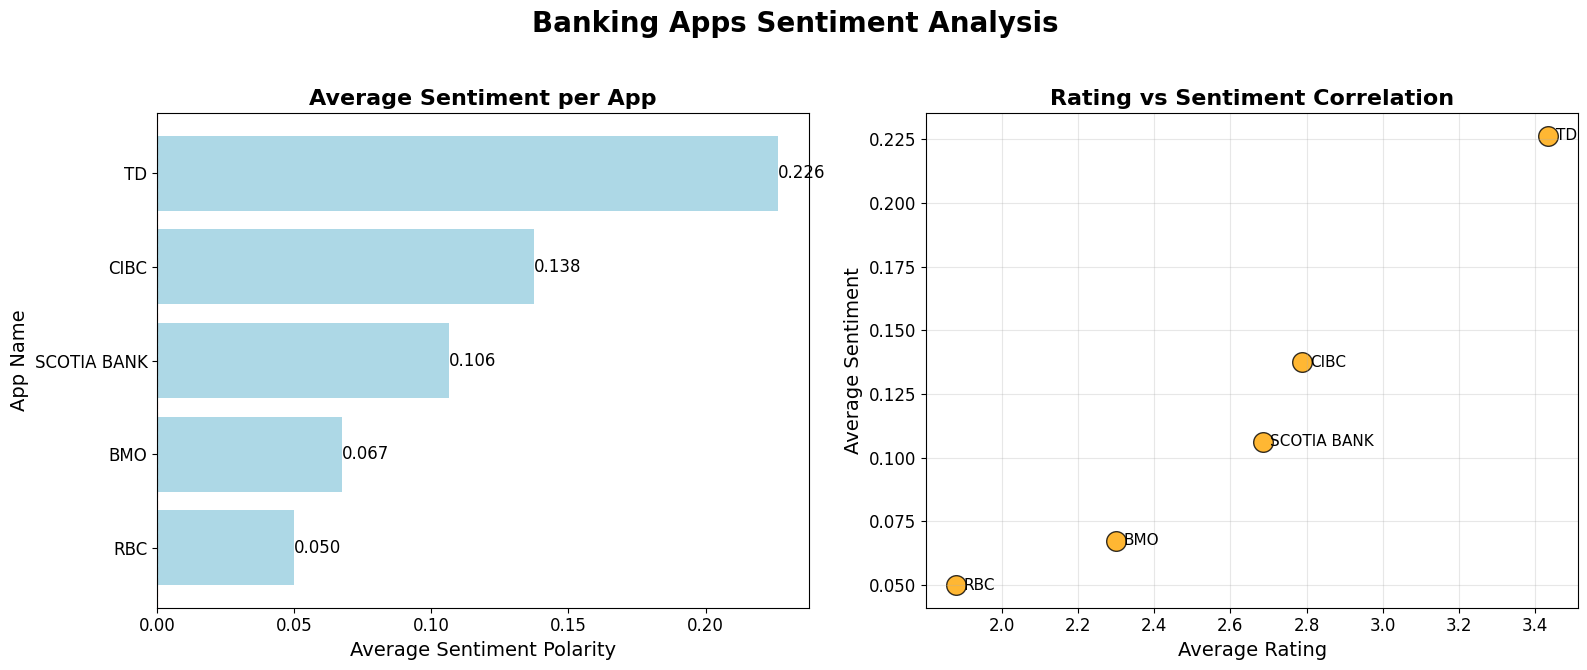

In [8]:
def create_sentiment_visualizations(sentiment_df):
    # Create subplots - 2 plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Banking Apps Sentiment Analysis', fontsize=20, fontweight='bold')

    # ========== 1. Average Sentiment per App ==========
    ax1 = axes[0]
    sentiment_by_app = sentiment_df.groupby('bank')['sentiment_polarity'].mean().sort_values()
    bars1 = ax1.barh(sentiment_by_app.index, sentiment_by_app.values, color='lightblue')
    ax1.set_xlabel('Average Sentiment Polarity', fontsize=14)
    ax1.set_ylabel('App Name', fontsize=14)
    ax1.set_title('Average Sentiment per App', fontsize=16, fontweight='bold')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    ax1.tick_params(axis='both', which='major', labelsize=12)

    # Add value labels
    for bar in bars1:
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                ha='left', va='center', fontsize=12)

    # ========== 2. Rating vs Sentiment Correlation (Single Point per App) ==========
    ax2 = axes[1]

    # Compute average rating and sentiment per app
    grouped = sentiment_df.groupby('bank').agg({
        'score': 'mean',
        'sentiment_polarity': 'mean'
    }).reset_index()

    # Assign colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(grouped)))
    ax2.scatter(grouped['score'], grouped['sentiment_polarity'], 
                s=200, color='orange', edgecolors='black', alpha=0.8)

    # Add app name labels
    for i, row in grouped.iterrows():
        ax2.text(row['score'] + 0.02, row['sentiment_polarity'], row['bank'], 
                fontsize=11, va='center')

    # Labels and style
    ax2.set_xlabel('Average Rating', fontsize=14)
    ax2.set_ylabel('Average Sentiment', fontsize=14)
    ax2.set_title('Rating vs Sentiment Correlation', fontsize=16, fontweight='bold')
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.grid(True, alpha=0.3)

    # Final layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('sentiment_rating_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


create_sentiment_visualizations(df)